# Covid <a id='Project2'></a>


https://towardsdatascience.com/data-visualization-with-python-folium-maps-a74231de9ef7

In [1]:
import os
import pandas as pd
#os.getcwd()
#os.chdir('/Users/ronny/downloads')
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [2]:
# fix wide data to proper dataframe using melt
df_confirmed = df_confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df_confirmed.columns = ['State','Country','Lat','Long','Date','Confirmed']

df_death = df_death.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df_death.columns = ['State','Country','Lat','Long','Date','Death']

df_recovered = df_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df_recovered.columns = ['State','Country','Lat','Long','Date','Recovered']

In [3]:
df = df_confirmed.join(df_death['Death']).join(df_recovered['Recovered'])
df['Date'] = pd.to_datetime(df['Date'])


df.to_csv('covid.csv')

In [5]:
df[df['Country']=='Australia']

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0.0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0.0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0.0
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0.0
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
113173,Queensland,Australia,-27.4698,153.0251,2021-03-10,1373,6,NaN
113174,South Australia,Australia,-34.9285,138.6007,2021-03-10,624,4,NaN
113175,Tasmania,Australia,-42.8821,147.3272,2021-03-10,234,13,NaN
113176,Victoria,Australia,-37.8136,144.9631,2021-03-10,20483,820,NaN


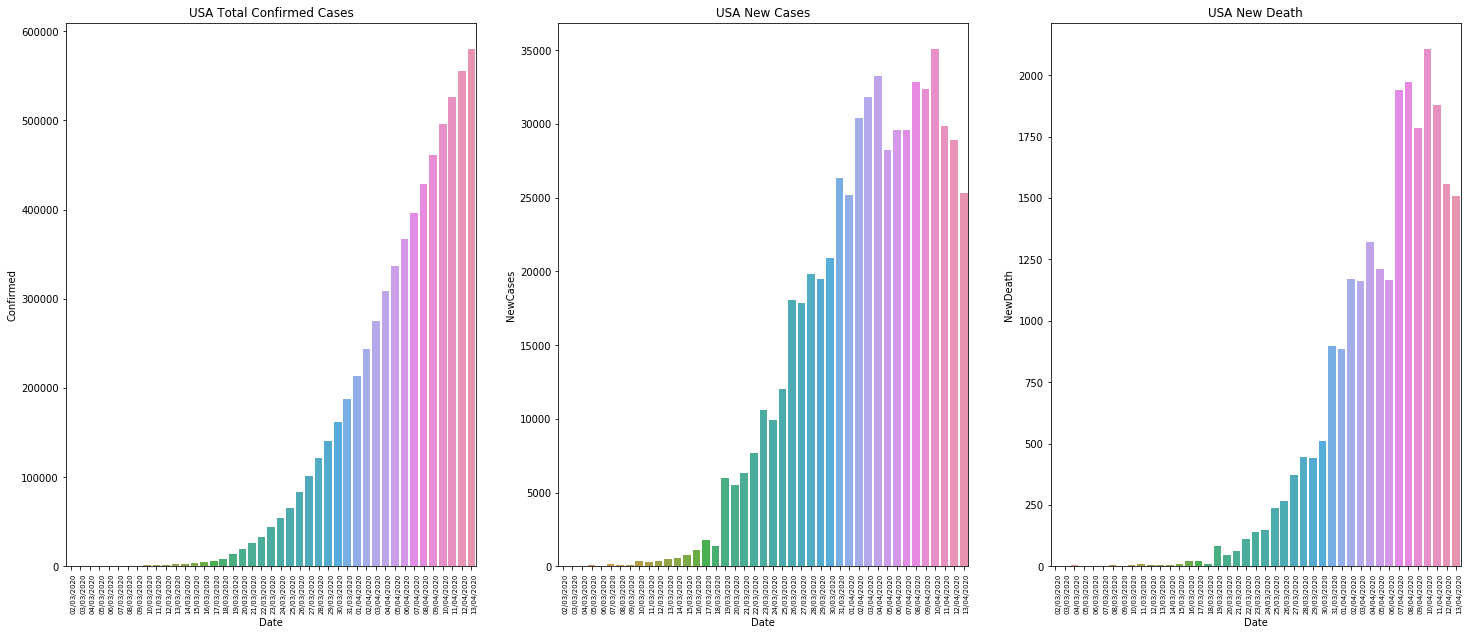

In [5]:
#Country = df[(df['Date']>'2020/03/01') & (df['Country']=='Italy')]
import matplotlib.pyplot as plt
import seaborn as sns

Country = df[(df['Date']>'2020/03/01') & (df['Country']=='US')].groupby(['Date','Country']).sum()
Country.reset_index(inplace=True)

Country = Country.sort_values(['Date'],ascending=True)     # sort values for cal purpose later on, use ascending otherwise you get negative numbers
Country['NewDeath']= Country[['Death']].diff()
Country['NewCases']= Country[['Confirmed']].diff()
Country['Mortality%']= Country['Death']/Country['Confirmed']*100
Country['Date'] = Country['Date'].dt.strftime('%d/%m/%Y')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))

chart = sns.barplot(x='Date',y='Confirmed',data=Country, ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='USA Total Confirmed Cases')

chart = sns.barplot(x='Date',y='NewCases',data=Country, ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='USA New Cases')

chart = sns.barplot(x='Date',y='NewDeath',data=Country, ax=ax3)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='USA New Death')

plt.show()


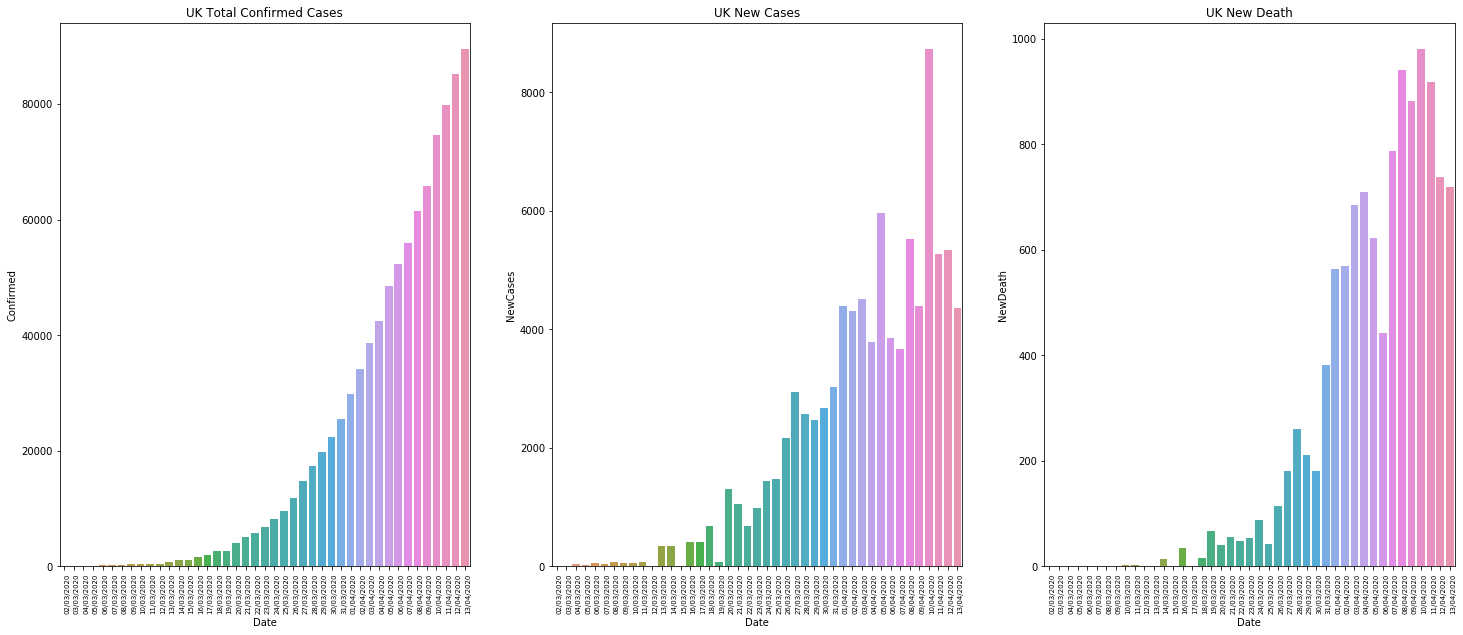

In [6]:
#Country = df[(df['Date']>'2020/03/01') & (df['Country']=='Italy')]
import matplotlib.pyplot as plt
import seaborn as sns

Country = df[(df['Date']>'2020/03/01') & (df['Country']=='United Kingdom')].groupby(['Date','Country']).sum()
Country.reset_index(inplace=True)

Country = Country.sort_values(['Date'],ascending=True)     # sort values for cal purpose later on, use ascending otherwise you get negative numbers
Country['NewDeath']= Country[['Death']].diff()
Country['NewCases']= Country[['Confirmed']].diff()
Country['Mortality%']= Country['Death']/Country['Confirmed']*100
Country['Date'] = Country['Date'].dt.strftime('%d/%m/%Y')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))

chart = sns.barplot(x='Date',y='Confirmed',data=Country, ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='UK Total Confirmed Cases')

chart = sns.barplot(x='Date',y='NewCases',data=Country, ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='UK New Cases')

chart = sns.barplot(x='Date',y='NewDeath',data=Country, ax=ax3)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='UK New Death')

plt.show()


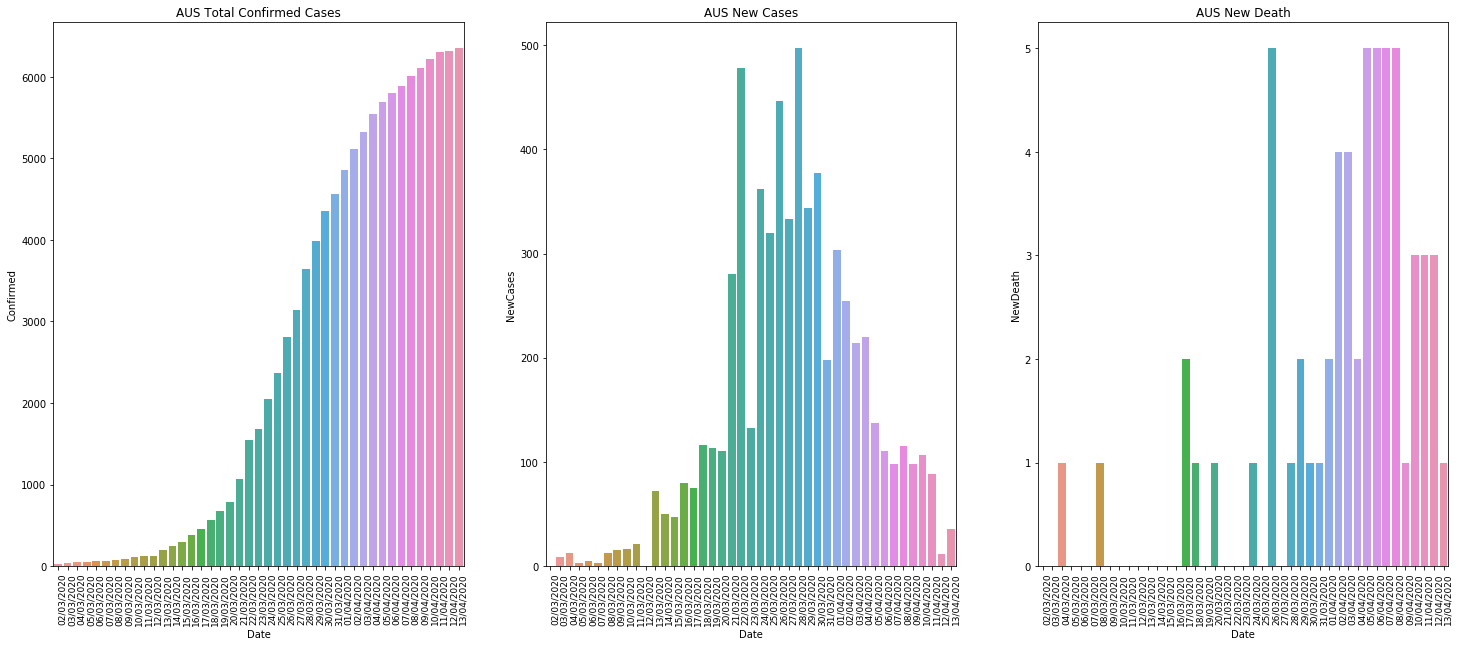

In [11]:
#Country = df[(df['Date']>'2020/03/01') & (df['Country']=='Italy')]
import matplotlib.pyplot as plt
import seaborn as sns

Country = df[(df['Date']>'2020/03/01') & (df['Country']=='Australia')].groupby(['Date','Country']).sum()
Country.reset_index(inplace=True)

Country = Country.sort_values(['Date'],ascending=True)     # sort values for cal purpose later on, use ascending otherwise you get negative numbers
Country['NewDeath']= Country[['Death']].diff()
Country['NewCases']= Country[['Confirmed']].diff()
Country['Mortality%']= Country['Death']/Country['Confirmed']*100
Country['Date'] = Country['Date'].dt.strftime('%d/%m/%Y')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))

chart = sns.barplot(x='Date',y='Confirmed',data=Country, ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=9)
chart.set(title='AUS Total Confirmed Cases')

chart = sns.barplot(x='Date',y='NewCases',data=Country, ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=9)
chart.set(title='AUS New Cases')

chart = sns.barplot(x='Date',y='NewDeath',data=Country, ax=ax3)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=9)
chart.set(title='AUS New Death')

plt.show()


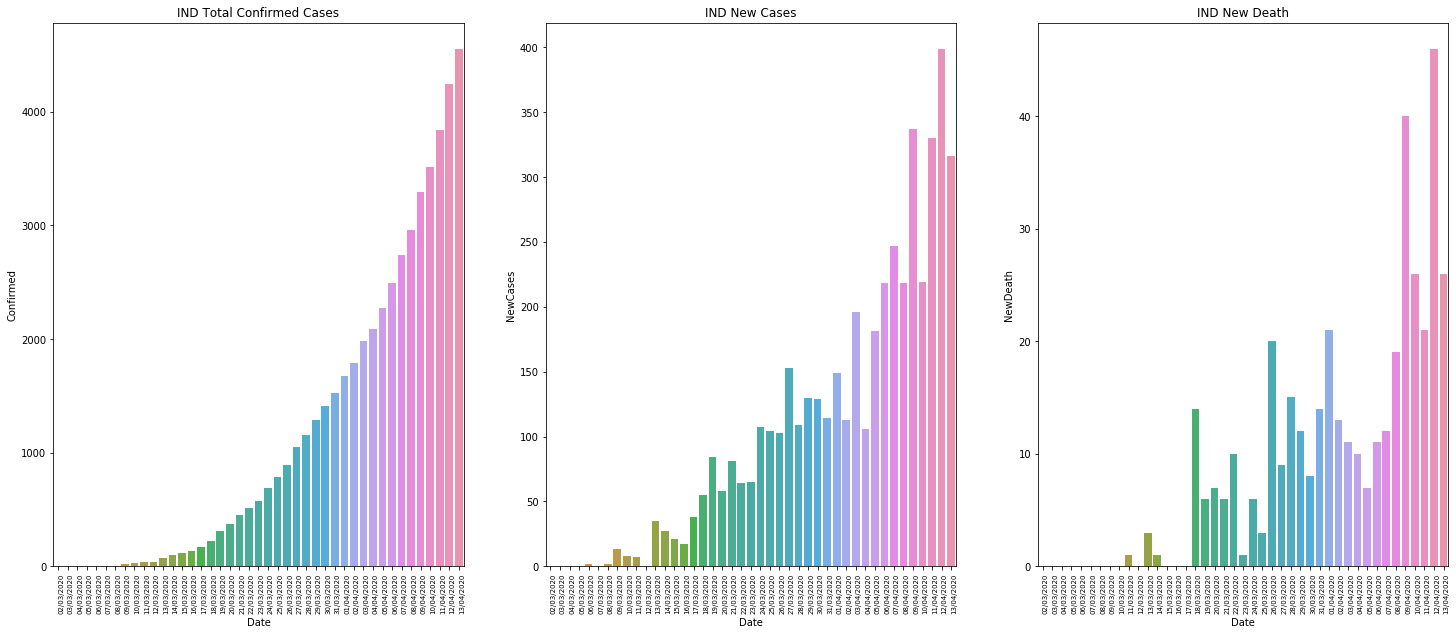

In [8]:
#Country = df[(df['Date']>'2020/03/01') & (df['Country']=='Italy')]
import matplotlib.pyplot as plt
import seaborn as sns

Country = df[(df['Date']>'2020/03/01') & (df['Country']=='Indonesia')].groupby(['Date','Country']).sum()
Country.reset_index(inplace=True)

Country = Country.sort_values(['Date'],ascending=True)     # sort values for cal purpose later on, use ascending otherwise you get negative numbers
Country['NewDeath']= Country[['Death']].diff()
Country['NewCases']= Country[['Confirmed']].diff()
Country['Mortality%']= Country['Death']/Country['Confirmed']*100
Country['Date'] = Country['Date'].dt.strftime('%d/%m/%Y')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))

chart = sns.barplot(x='Date',y='Confirmed',data=Country, ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='IND Total Confirmed Cases')

chart = sns.barplot(x='Date',y='NewCases',data=Country, ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='IND New Cases')

chart = sns.barplot(x='Date',y='NewDeath',data=Country, ax=ax3)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='left',fontsize=7)
chart.set(title='IND New Death')

plt.show()


In [119]:
t

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered,grouping
112896,Australian Capital Territory,Australia,-35.4735,149.0124,2021-03-09,123,3,NaN,0
112897,New South Wales,Australia,-33.8688,151.2093,2021-03-09,5220,54,NaN,2
112898,Northern Territory,Australia,-12.4634,130.8456,2021-03-09,105,0,NaN,0
112899,Queensland,Australia,-27.4698,153.0251,2021-03-09,1367,6,NaN,0
112900,South Australia,Australia,-34.9285,138.6007,2021-03-09,621,4,NaN,0
112901,Tasmania,Australia,-42.8821,147.3272,2021-03-09,234,13,NaN,0
112902,Victoria,Australia,-37.8136,144.9631,2021-03-09,20483,820,NaN,9
112903,Western Australia,Australia,-31.9505,115.8605,2021-03-09,921,9,NaN,0


In [123]:
t = df[(df['Date']=='2021-03-9') & (df['Country']=='Australia')]
t['grouping'] = pd.cut(t['Death'], 10, labels=False)
#t = t.dropna()

<ipython-input-123-73e8d7f3c0d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['grouping'] = pd.cut(t['Death'], 10, labels=False)


In [125]:
import folium
m=folium.Map(location=[-33.8688, 151.2093],zoom_start=3.8)  # chamge zoom size the larger the closer
m

#colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'red'}
max = t['Confirmed'].max()

for lat,long,state,cases,group in zip(t['Lat'],t['Long'],t['State'],t['Confirmed'],t['grouping']):
    folium.CircleMarker(
        [lat,long], 
        popup=(state,cases),   
        radius = cases/max*35,           # determines the size of the baloon
        color='a',
        key_on = group,        # not sure
        #threshold_scale=[0,1,2,3],         # not sure
        #fill_color=colordict[group],       # color coding for diff groups
        fill=True,
        fill_opacity=0.7
    ).add_to(m)
    
m

3799

In [26]:
import folium
m=folium.Map(location=[-33.88060821822735, 151.20555291636268],zoom_start=5)  # chamge zoom size the larger the closer
m



tooltip = "Click me!"


mylist = zip(a,b)


for i in mylist:
    folium.Marker(
        i, popup="<i>Power House Museum</i>", tooltip=tooltip
    ).add_to(m)


m

In [29]:
m.Choropleth(zip(a,b), data=test['Confirmed'],
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2)
 

AttributeError: 'Map' object has no attribute 'Choropleth'